In [74]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv("Cleaned_NFLPlayerDetails_NoOutliers.csv")
df

,First Name,Last Name,College,Salary,Team,Position,Age,Experience Years,Draft Year,Draft Round,Agent,Player Status
0,Dak,Prescott,Mississippi State,450000.000000,Cowboys,QB,27.0,5.0,2016,Round 4 (#135 overall),Todd France (CAA Sports),1
1,Aaron,Rodgers,California,230000.000000,Packers,QB,37.0,NaN,2005,Round 1 (#24 overall),David Dunn (Athletes First),1
2,Matthew,Stafford,Georgia,NaN,Rams,QB,33.0,NaN,2009,Round 1 (#1 overall),Tom Condon (CAA Sports),1
3,Joey,Bosa,Ohio State,450000.000000,Chargers,DE,25.0,5.0,2016,Round 1 (#3 overall),Brian Ayrault (CAA Sports),1
4,Jimmy,Garoppolo,Eastern Illinois,420000.000000,49ers,QB,29.0,7.0,2014,Round 2 (#62 overall),Don Yee (Yee & Dubin Sports),1
...,...,...,...,...,...,...,...,...,...,...,...,...
4072,Colby,Gossett,Appalachian State,383819.960644,Browns,G,25.0,2.0,2018,Round 6 (#213 overall),"Billy Conaty, Edward Johnson, Tony Agnone (Eas...",1
4073,Jeremiah,Valoaga,Lions,300883.000000,Raiders,DE,26.0,3.0,Undrafted,Undrafted,Nevada-Las Vegas,0
4074,Hunter,Sharp,Eagles,23750.000000,Bengals,WR,27.0,1.0,Undrafted,Undrafted,Utah State,0
4075,LaTroy,Lewis,Unknown,86400.000000,Titans,ILB,27.0,1.0,Undrafted,Undrafted,Tennessee,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   First Name        4077 non-null   object 
 1   Last Name         4077 non-null   object 
 2   College           4077 non-null   object 
 3   Salary            4044 non-null   float64
 4   Team              4077 non-null   object 
 5   Position          4077 non-null   object 
 6   Age               4010 non-null   float64
 7   Experience Years  3848 non-null   float64
 8   Draft Year        4077 non-null   object 
 9   Draft Round       4077 non-null   object 
 10  Agent             4077 non-null   object 
 11  Player Status     4077 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 382.3+ KB


In [77]:
for i in range(len(df["Draft Year"])):
    if not df["Draft Year"][i].isnumeric():
        df["Draft Year"][i] = np.nan


In [78]:
for i in range(len(df["Draft Round"])):

    if "Round" in df["Draft Round"][i]:
        try:
            df["Draft Round"][i] = df["Draft Round"][i].split(" ")[2]
        except:
            df["Draft Round"][i]
            
    else:
        df["Draft Round"][i] = np.nan


In [79]:
# df["Salary"] = pd.to_numeric(df["Salary"])
# df["Age"] = pd.to_numeric(df["Age"])
# df["Experience Years"] = pd.to_numeric(df["Experience Years"])
# df["Draft Year"] = pd.to_numeric(df["Draft Year"])
# df["Draft Round"] = pd.to_numeric(df["Draft Round"])

# df["Salary"].fillna(df["Salary"].mean(), inplace = True)
# df["Age"].fillna(df["Age"].mean(), inplace = True)
# df["Experience Years"].fillna(df["Experience Years"].mean(), inplace = True)
# df["Draft Year"].fillna(df["Draft Year"].mean(), inplace = True)
# df["Draft Round"].fillna(df["Draft Round"].mean(), inplace = True)



In [80]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df.isnull().sum()

First Name          0
Last Name           0
College             0
Salary              0
Team                0
Position            0
Age                 0
Experience Years    0
Draft Year          0
Draft Round         0
Agent               0
Player Status       0
dtype: int64

In [81]:
def load_dataset(df, label_column):
    
    TRAINING_FEATURES = df.columns[df.columns != label_column]
    TARGET_FEATURE    = label_column

    X = df[TRAINING_FEATURES]
    y = df[TARGET_FEATURE]
    
    return X,y

def split_to_train_and_test(X, y, test_ratio, rand_state):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    
    return X_train, X_test, y_train, y_test

def convert_to_numeric(df):
    df_obj = df.select_dtypes(exclude=['int64', 'float64'])
    df_num = df.select_dtypes(include=['int64', 'float64'])
    df_encoded = df_obj.apply(LabelEncoder().fit_transform)
    return df_num.join(df_encoded)

def train_classifier(X_train, y_train):
    return linear_model.LinearRegression().fit(X_train, y_train)

def predict(classifier, X_test, y_test):
    y_pred=classifier.predict(X_test)
    return pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [82]:
df_numeric = df.drop(['First Name','Last Name','Agent'],axis='columns')
df_numeric = convert_to_numeric(df_numeric)

df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Salary            2167 non-null   float64
 1   Age               2167 non-null   float64
 2   Experience Years  2167 non-null   float64
 3   Player Status     2167 non-null   int64  
 4   College           2167 non-null   int32  
 5   Team              2167 non-null   int32  
 6   Position          2167 non-null   int32  
 7   Draft Year        2167 non-null   int32  
 8   Draft Round       2167 non-null   int32  
dtypes: float64(3), int32(5), int64(1)
memory usage: 110.2 KB


In [83]:
X,y = load_dataset(df_numeric,"Salary")
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, 0.3, 41)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #2167
Number of training samples: #1516
Number of test samples: #651

Target distribution in original dataset:
660000.0    188
495000.0    178
610000.0    172
480000.0    171
450000.0    156
           ... 
208446.0      1
136765.0      1
486468.0      1
61320.0       1
28800.0       1
Name: Salary, Length: 194, dtype: int64

Target distribution in the training set:
660000.0    132
450000.0    116
480000.0    115
610000.0    114
495000.0    114
           ... 
535880.0      1
535882.0      1
103082.0      1
217941.0      1
7600.0        1
Name: Salary, Length: 152, dtype: int64

Target distribution in the test set:
495000.0    64
610000.0    58
480000.0    56
660000.0    56
450000.0    40
            ..
390516.0     1
548235.0     1
548231.0     1
220000.0     1
411000.0     1
Name: Salary, Length: 83, dtype: int64


In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print("Mean: ", X_train_scaled.mean(axis=0))
print("Standard Deviation: ", X_train_scaled.std(axis=0))

Mean:  [-1.40608721e-17  1.57013072e-16  8.78804505e-17  3.28087015e-17
 -3.28087015e-17  4.92130523e-17 -1.06628280e-16  4.51119646e-17]
Standard Deviation:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [85]:
X_test_scaled = scaler.transform(X_test)
print("Mean: ", X_test_scaled.mean(axis=0))
print("Standard Deviation: ", X_test_scaled.std(axis=0))

Mean:  [ 0.02624804 -0.02314101 -0.03075528  0.00949853  0.01746154 -0.0392082
 -0.01612922  0.13865902]
Standard Deviation:  [1.04139035 0.98598099 1.01163432 1.02038261 0.98108283 0.97816785
 1.03324213 1.02883621]


In [86]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_in_range = min_max_scaler.fit_transform(X_train)
print("Min Value: ", X_train_scaled_in_range.min(axis=0))
print("Max Value: ", X_train_scaled_in_range.max(axis=0))
X_test_scaled_in_range = min_max_scaler.transform(X_test)

Min Value:  [0. 0. 0. 0. 0. 0. 0. 0.]
Max Value:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [87]:
clf_model = train_classifier(X_train, y_train)

In [88]:
y_pred = clf_model.predict(X_test)

In [89]:
print('Coefficients:', clf_model.coef_)
print('Intercept:', clf_model.intercept_)
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [  -529.32720782  13467.97924026 -26053.34847676    -37.20414988
   -246.12049745     47.2110083   25859.73020018  -6759.69665279]
Intercept: 86372.96308833623
Coefficient of determination (R^2): 0.63


In [90]:
df

,First Name,Last Name,College,Salary,Team,Position,Age,Experience Years,Draft Year,Draft Round,Agent,Player Status
0,Dak,Prescott,Mississippi State,450000.000000,Cowboys,QB,27.0,5.000000,2016,4,Todd France (CAA Sports),1
1,Joey,Bosa,Ohio State,450000.000000,Chargers,DE,25.0,5.000000,2016,1,Brian Ayrault (CAA Sports),1
2,Jimmy,Garoppolo,Eastern Illinois,420000.000000,49ers,QB,29.0,7.000000,2014,2,Don Yee (Yee & Dubin Sports),1
3,Khalil,Mack,Buffalo,420000.000000,Bears,OLB,30.0,7.000000,2014,1,Joel Segal (Lagardere Unlimited),1
4,Aaron,Donald,Pittsburgh,420000.000000,Rams,DT,30.0,7.000000,2014,1,Brian Ayrault (CAA Sports),1
...,...,...,...,...,...,...,...,...,...,...,...,...
2162,Derwin,Gray,Maryland,383819.960644,Jaguars,T,26.0,1.000000,2019,7,"Isaac Conner, Chad Speck (Allegiant Athletic A...",1
2163,Kyle,Hinton,Washburn,134400.000000,Vikings,G,23.0,4.972585,2020,7,SportStars,1
2164,Andre,Williams,Boston College,420000.000000,Chargers,RB,28.0,3.000000,2014,4,Dan McElroy (Select Sports Group),0
2165,Colby,Gossett,Appalachian State,383819.960644,Browns,G,25.0,2.000000,2018,6,"Billy Conaty, Edward Johnson, Tony Agnone (Eas...",1


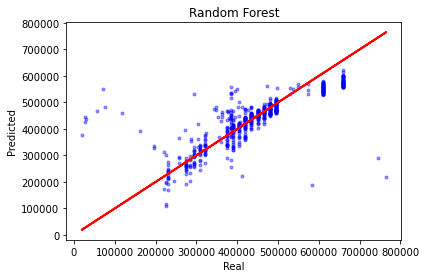

In [91]:
plt.scatter(y_test, y_pred, color='blue', marker='.', alpha=0.4)
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Random Forest')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()